# Einstein solid interactions using object-oriented programming
[**Download this notebook**](https://ifa-edu-it.github.io/learning-material/courses/statistical/einstein-solid.ipynb)

This notebook is based on the problem set and code [Boltzmann distribution, the statistical way](https://www.compadre.org/picup/exercises/exercise.cfm?A=boltzmann) from [PICUP](https://www.compadre.org/PICUP/webdocs/About.cfm).
The learning material from PICUP includes a notebook and four excercises, where the students gain insight into the Boltzmann distribution and thermal equilibrium.

The notebook build upon the notebook "Introduction to object-oriented programming", where the basic principles of creating classes and class-objects are introduced. Here classes are used to define Einstein solids with a specified number of oscillators and energy units. The methods in the `EinsteinSolid`-class allows for interactions between the oscillators in the solid.

When creating a new `EinsteinSolid` object, we specify the number of oscillators/cells `N` and number of energy units per oscillator `q`. 

The `__add__` method allows to combine two solids, so the total number of cells is `N` = `N1` + `N2`. 

The method `exchange` is the main method in the notebook and describes interactions between cells in the Einstein solid. When `exchange` is used, it runs through `L` interactions. For each interaction two random cells are chosen; one from which we take an energy unit, and one which we give it to. If the cell, from which we take the energy unit, doesn't have any energy units left, we choose another random cell in line 20 and 21. Here it is also assured that a cell does not interact with itself. 

Finally, the `sample` method allows us to sample the energy distribution after the `L` energy exchanges. The method counts the number of cells with `q` energy units for every value of `q`, until all `N` cells have been counted. The method returns the maximal energy, a list of all energies, a list of the probability of each energy and a list of the standard deviation corresponding to each probability. 

In [2]:
import random as rnd
import matplotlib.pyplot as plt, numpy as np
from  matplotlib import animation as am
import numpy as np

class EinsteinSolid:                        # Einstein solid object
    def __init__(self, N=400, q=10):
        self.N = N
        self.cell = [q]*N                   # N cells, q units energy per cell
        
    def __add__(self, other):               # combine two solids
        self.N += other.N
        self.cell += other.cell
        return self
        
    def exchange(self, L=20):               # iterate L times
        for i in range(L):
            take = rnd.randint(0, self.N-1) # random pair
            give = rnd.randint(0, self.N-1) 
            while self.cell[take] == 0 or take == give:     # find a nonzero-energy cell
                take = rnd.randint(0, self.N-1)
            self.cell[take] -= 1            # exchange energy
            self.cell[give] += 1

    def sample(self):                       # sample energy distribution
        N, Nt, q = self.N, 0, 0
        pn = []
        qs = []
        while Nt < N:
            n = self.cell.count(q)          # num of oscillators with energy q
            pn.append(n / N)                    # counts
            qs.append(q)
            
            Nt += n
            q  += 1                          # increase energy

        error = np.sqrt(np.array(pn))                 # statistical error
        return q, qs, np.array(pn), error/N

def updateimg(*args):                   # args[0] = frame
    L = 20 if args[0]<100 else 200      # slower initial rate
    solid.exchange(L)
    plot.set_data(np.reshape(solid.cell, (K,K)))  # update image
    return [plot]                       # return line object in a list



Below the energy of each of the `N` cells of the Einstein solid can either be animated, if `animate = True`, or plotted. 
In the animation the oscillators are displayed in a square grid for easy visualization. The colormap shows the energy of each cell in the solid, as the cells interact randomly with each other. The animation is safed as a gif file as $"animation.gif"$.

If `animate = False` a plot of the energy distribution is produced. The plot displays probability as function of energy. The orange points show the "data points" from the simulation, and the black graph represents the normalized theoretical Boltzmann distribution 
$$P_n = C e^{-E_n/kT},$$
where $C$ is a normalization constant.

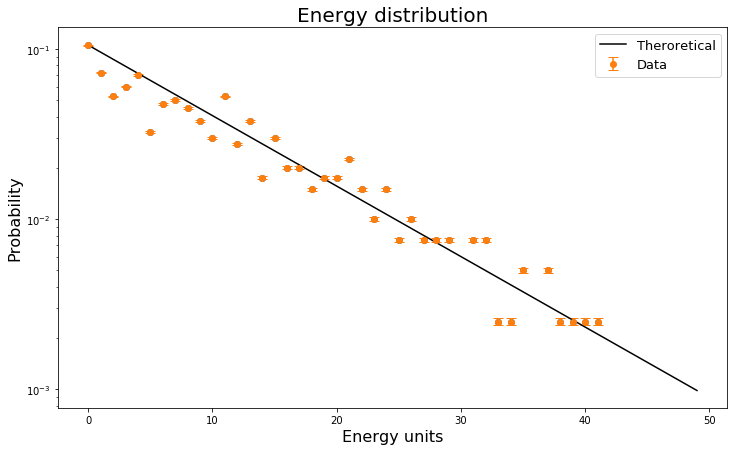

In [4]:
# set up solid
K = 20                                # grid dimension
qavg = 10                               # avg  units of energy per oscillator
solid = EinsteinSolid(N = K*K, q=qavg)

# Analytic Boltzmann distribution: q_avg = 1/(exp(1/kT)-1) => 1/kT=ln(1+1/qavg)
kT = 1/np.log(1+1./qavg)
Emax = 5*qavg
En=np.arange(Emax)
animate = False

# animate simulation
if animate:
    fig = plt.figure(figsize = (12, 7))

    img = np.reshape(solid.cell, (K, K))     # shape to KxK image
    plot = plt.imshow(img, interpolation='none', vmin=0, vmax=30, cmap="jet")
    plt.colorbar(plot)
    plt.xticks([])
    plt.yticks([])
    anim = am.FuncAnimation(fig, updateimg, interval=10, blit=True)  # animate
    
    # Saves the animation as "animation.gif"
    f = r"animation.gif" 
    writergif = am.PillowWriter(fps=50) 
    anim.save(f, writer=writergif)


else:
    #Plot energy distribution
    plt.figure(figsize = (12, 7))

    solid.exchange(L=100*solid.N)         # thermalize, 100 interactions per oscillator 
    qmax, qs, pn, error = solid.sample()
    plt.plot(range(qmax), pn, 'o')
    plt.errorbar(qs, pn, yerr = error, linestyle="None", capsize = 5, marker = "o", label = "Data")
    pmax = max(pn)        
    plt.plot(En, np.exp(-En/kT)*pmax, '-k', label = "Theroretical")    # normalized theoretical result  
    plt.title("Energy distribution", fontsize = 20)
    plt.xlabel('Energy units', fontsize = 16)
    plt.ylabel('Probability', fontsize = 16)
    plt.semilogy()        # semilog scale    
    plt.legend(fontsize = 13)
    
plt.show()
